## Neural Network Classifiers

Neural Networks can learn complex interactions among features for classification. First, we use logistic regression to classify flowers using the Iris dataset. Then, we train a simple neural network to do the same using [Keras](https://keras.io/) running on top of [TensorFlow](https://www.tensorflow.org/). 


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets


from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Iris Data 

In [8]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Targets 0, 1, 2 correspond to three species: setosa, versicolor, and virginica. 

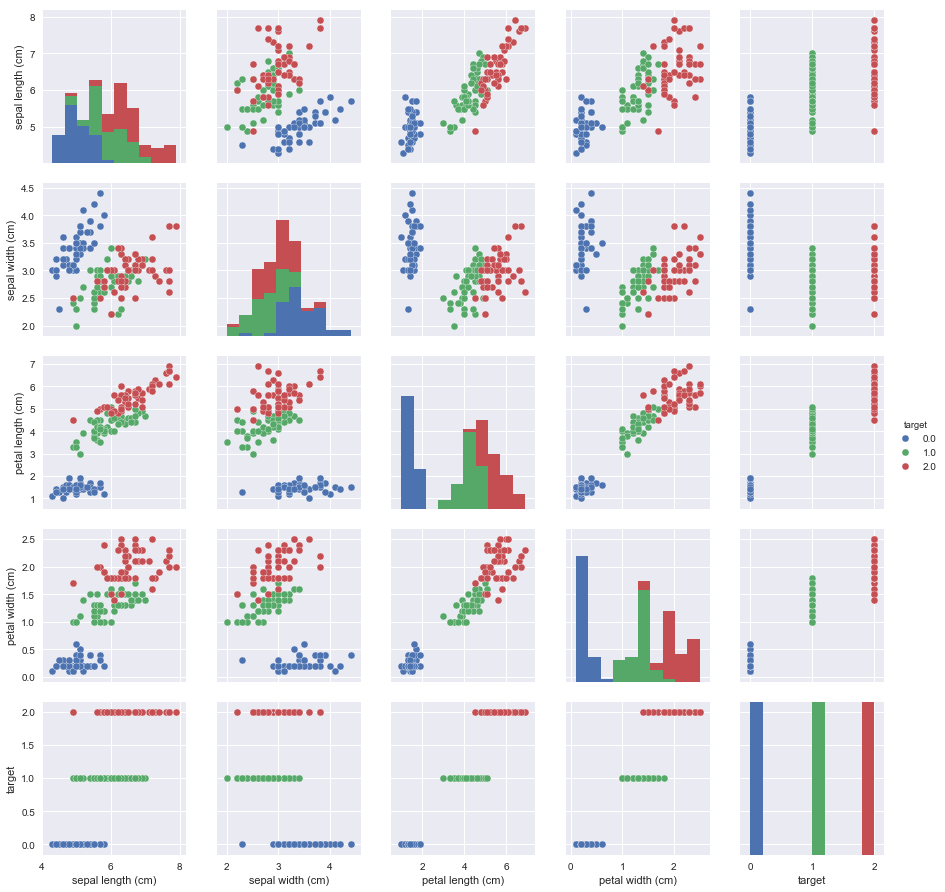

In [17]:
sns.pairplot(iris_df, hue="target")

In [22]:
X = iris_df.values[:, :4]
Y = iris_df.values[: , 4]

### Split into Training and Testing

In [23]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.5, random_state=0)

### Let's test out a Logistic Regression Classifier

In [24]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_Y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [26]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_Y)))

Accuracy = 0.83


### Let's Train a Neural Network Classifier

In [27]:
# Let's Encode the Output in a vector (one hot encoding)
    # since this is what the network outputs
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_Y)
test_y_ohe = one_hot_encode_object_array(test_Y)

#### Defining the Network
* we have four features and three classes
* input layer must have 4 neurons (or units)
* output must have 3 neurons
* we'll add a single hidden layer (choose 16 neurons)

In [28]:
model = Sequential()
model.add(Dense(16, input_shape=(4,)))
model.add(Activation("sigmoid"))

In [29]:
# define output layer
model.add(Dense(3))
# softmax is used here, because there are three classes (sigmoid only works for two classes)
model.add(Activation("softmax"))

In [30]:
# define loss function and optimization
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

What's happening here? 

* optimizier: examples include stochastic gradient descent (going down steepest point)
    - ADAM (the one selected above) stands for Adaptive Moment Estimation
    - similar to stochastic gradient descent, but looks as exponentially decaying average and has a different update rule
* loss: classficiation error or mean square error are fine options
    - Categorical Cross Entropy is a better option for computing the gradient supposedly 

In [32]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0)

In [33]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.97


Nice! 14% more accurate than logistic regression. Although, you always have to wonder if we're overfitting...

#### How about training with stochastic gradient descent?

In [34]:
stochastic_net = Sequential()
stochastic_net.add(Dense(16, input_shape=(4,)))
stochastic_net.add(Activation("sigmoid"))

stochastic_net.add(Dense(3))

stochastic_net.add(Activation("softmax"))
stochastic_net.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
stochastic_net.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0)

In [36]:
loss, accuracy = stochastic_net.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.93


based on Mike William's [Getting Started with Deep Learning](https://www.safaribooksonline.com/oriole/getting-started-with-deep-learning-using-keras-and-python) on safaribooksonline

## Training a Neural Network to Classify Digits

#### Load Handwritten Digits Data

In [32]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

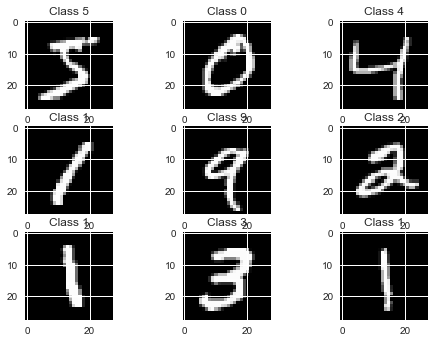

In [33]:
# show sample data
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))


In [34]:
X_train.shape

(60000, 28, 28)

### Transform the 28x28 images into vectors we can input into our neural network

In [75]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# without scaling, network performs poorly (got around 40% accuracy)
X_train /= 255
X_test /= 255

now we have an input vector of size 784, encoding each pixel 

### Transform Output using One Hot Encoding

In [76]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Define a single layer Network

In [77]:
model = Sequential()

In [78]:
# Hidden Layer 

model.add(Dense(512, input_shape=(784,)))
# use a rectified linear unit as activation
    # bascially a line y =x for x ≥ 0; 0 otherwise
model.add(Activation("relu"))

note, you can also add a dropout rate (say 0.2) to prevent overfiting

In [79]:
# Output
model.add(Dense(10))
model.add(Activation("softmax"))

In [80]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [81]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1)

Epoch 1/4
60000/60000 [==============================] - 3s - loss: 0.2703 - acc: 0.9239       

In [82]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy = {:.2f}".format(accuracy))

 9056/10000 [==========================>...] - ETA: 0s Accuracy = 0.98


This single layer network is 98% accurate—how amazing!